In [348]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split

In [349]:
# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(30, 30)

sns.set()

In [350]:
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [351]:
df_train=df.copy()

In [352]:
#Lista com todas as colunas do dataset de Treino
list(df_train.columns)

['Unnamed: 0',
 'NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR

In [353]:
#seleciando as colunas disponiveis no dataset de teste e incluindo a variável resposta
colunas = list(df_test.columns) + ['NU_NOTA_MT']
df_train=df_train[colunas]

In [354]:
df_train.describe().round(3)

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT
count,13730.000,13730.000,13730.000,13730.000,13730.000,13730.000,13730.000,4282.000,13730.000,4282.000,...,10133.000,13730.000,10133.000,10133.000,10133.000,10133.000,10133.000,10133.000,10133.000,10133.000
mean,30.737,21.594,2.186,1.049,1.783,2.146,1.354,1.179,0.130,2.260,...,516.473,0.594,1.102,119.812,111.916,106.824,113.124,77.372,529.048,482.498
std,9.862,7.044,1.007,0.259,0.881,3.217,0.558,0.565,0.336,0.699,...,68.688,0.491,0.700,29.846,33.738,34.341,33.480,43.067,154.295,99.826
min,11.000,13.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,23.000,17.000,1.000,1.000,1.000,0.000,1.000,1.000,0.000,2.000,...,468.100,0.000,1.000,120.000,100.000,80.000,100.000,40.000,440.000,408.900
50%,31.000,19.000,3.000,1.000,2.000,0.000,1.000,1.000,0.000,2.000,...,520.900,1.000,1.000,120.000,120.000,120.000,120.000,80.000,540.000,461.200
75%,35.000,23.000,3.000,1.000,2.000,3.000,2.000,1.000,0.000,2.000,...,564.900,1.000,1.000,140.000,120.000,120.000,120.000,100.000,600.000,537.600
max,53.000,67.000,5.000,4.000,4.000,10.000,4.000,3.000,1.000,4.000,...,763.600,1.000,9.000,200.000,200.000,200.000,200.000,200.000,1000.000,952.000


In [355]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 48 columns):
NU_INSCRICAO              13730 non-null object
CO_UF_RESIDENCIA          13730 non-null int64
SG_UF_RESIDENCIA          13730 non-null object
NU_IDADE                  13730 non-null int64
TP_SEXO                   13730 non-null object
TP_COR_RACA               13730 non-null int64
TP_NACIONALIDADE          13730 non-null int64
TP_ST_CONCLUSAO           13730 non-null int64
TP_ANO_CONCLUIU           13730 non-null int64
TP_ESCOLA                 13730 non-null int64
TP_ENSINO                 4282 non-null float64
IN_TREINEIRO              13730 non-null int64
TP_DEPENDENCIA_ADM_ESC    4282 non-null float64
IN_BAIXA_VISAO            13730 non-null int64
IN_CEGUEIRA               13730 non-null int64
IN_SURDEZ                 13730 non-null int64
IN_DISLEXIA               13730 non-null int64
IN_DISCALCULIA            13730 non-null int64
IN_SABATISTA              13730 non-null

In [356]:
#dataframe para analise dos dados
analise=pd.DataFrame({'Colunas':df_train.columns,
                     'tipos': df_train.dtypes,
                    'missings':df_train.isna().sum(),
                      'size':df_train.shape[0],
                    'unicos':df_train.nunique()})
analise['percentual']=round(analise['missings']/analise['size'],2)

In [357]:
analise

,Colunas,tipos,missings,size,unicos,percentual
NU_INSCRICAO,NU_INSCRICAO,object,0,13730,13730,0.00
CO_UF_RESIDENCIA,CO_UF_RESIDENCIA,int64,0,13730,27,0.00
SG_UF_RESIDENCIA,SG_UF_RESIDENCIA,object,0,13730,27,0.00
NU_IDADE,NU_IDADE,int64,0,13730,55,0.00
TP_SEXO,TP_SEXO,object,0,13730,2,0.00
TP_COR_RACA,TP_COR_RACA,int64,0,13730,6,0.00
TP_NACIONALIDADE,TP_NACIONALIDADE,int64,0,13730,5,0.00
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0,13730,4,0.00
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0,13730,11,0.00
TP_ESCOLA,TP_ESCOLA,int64,0,13730,4,0.00


In [358]:
#dropar as colunas TP_DEPENDENCIA_ADM_ESC, TP_ENSINO e Q027 pois estão com porcentagem de missing muito alta
#dropar também número de inscrição
dropar=['NU_INSCRICAO','TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO', 'Q027']

In [359]:
df_train.drop(columns = dropar, inplace = True)

In [360]:
#Definindo a matriz de correlação entre as variaveis 
matriz_corr=df_train.corr()

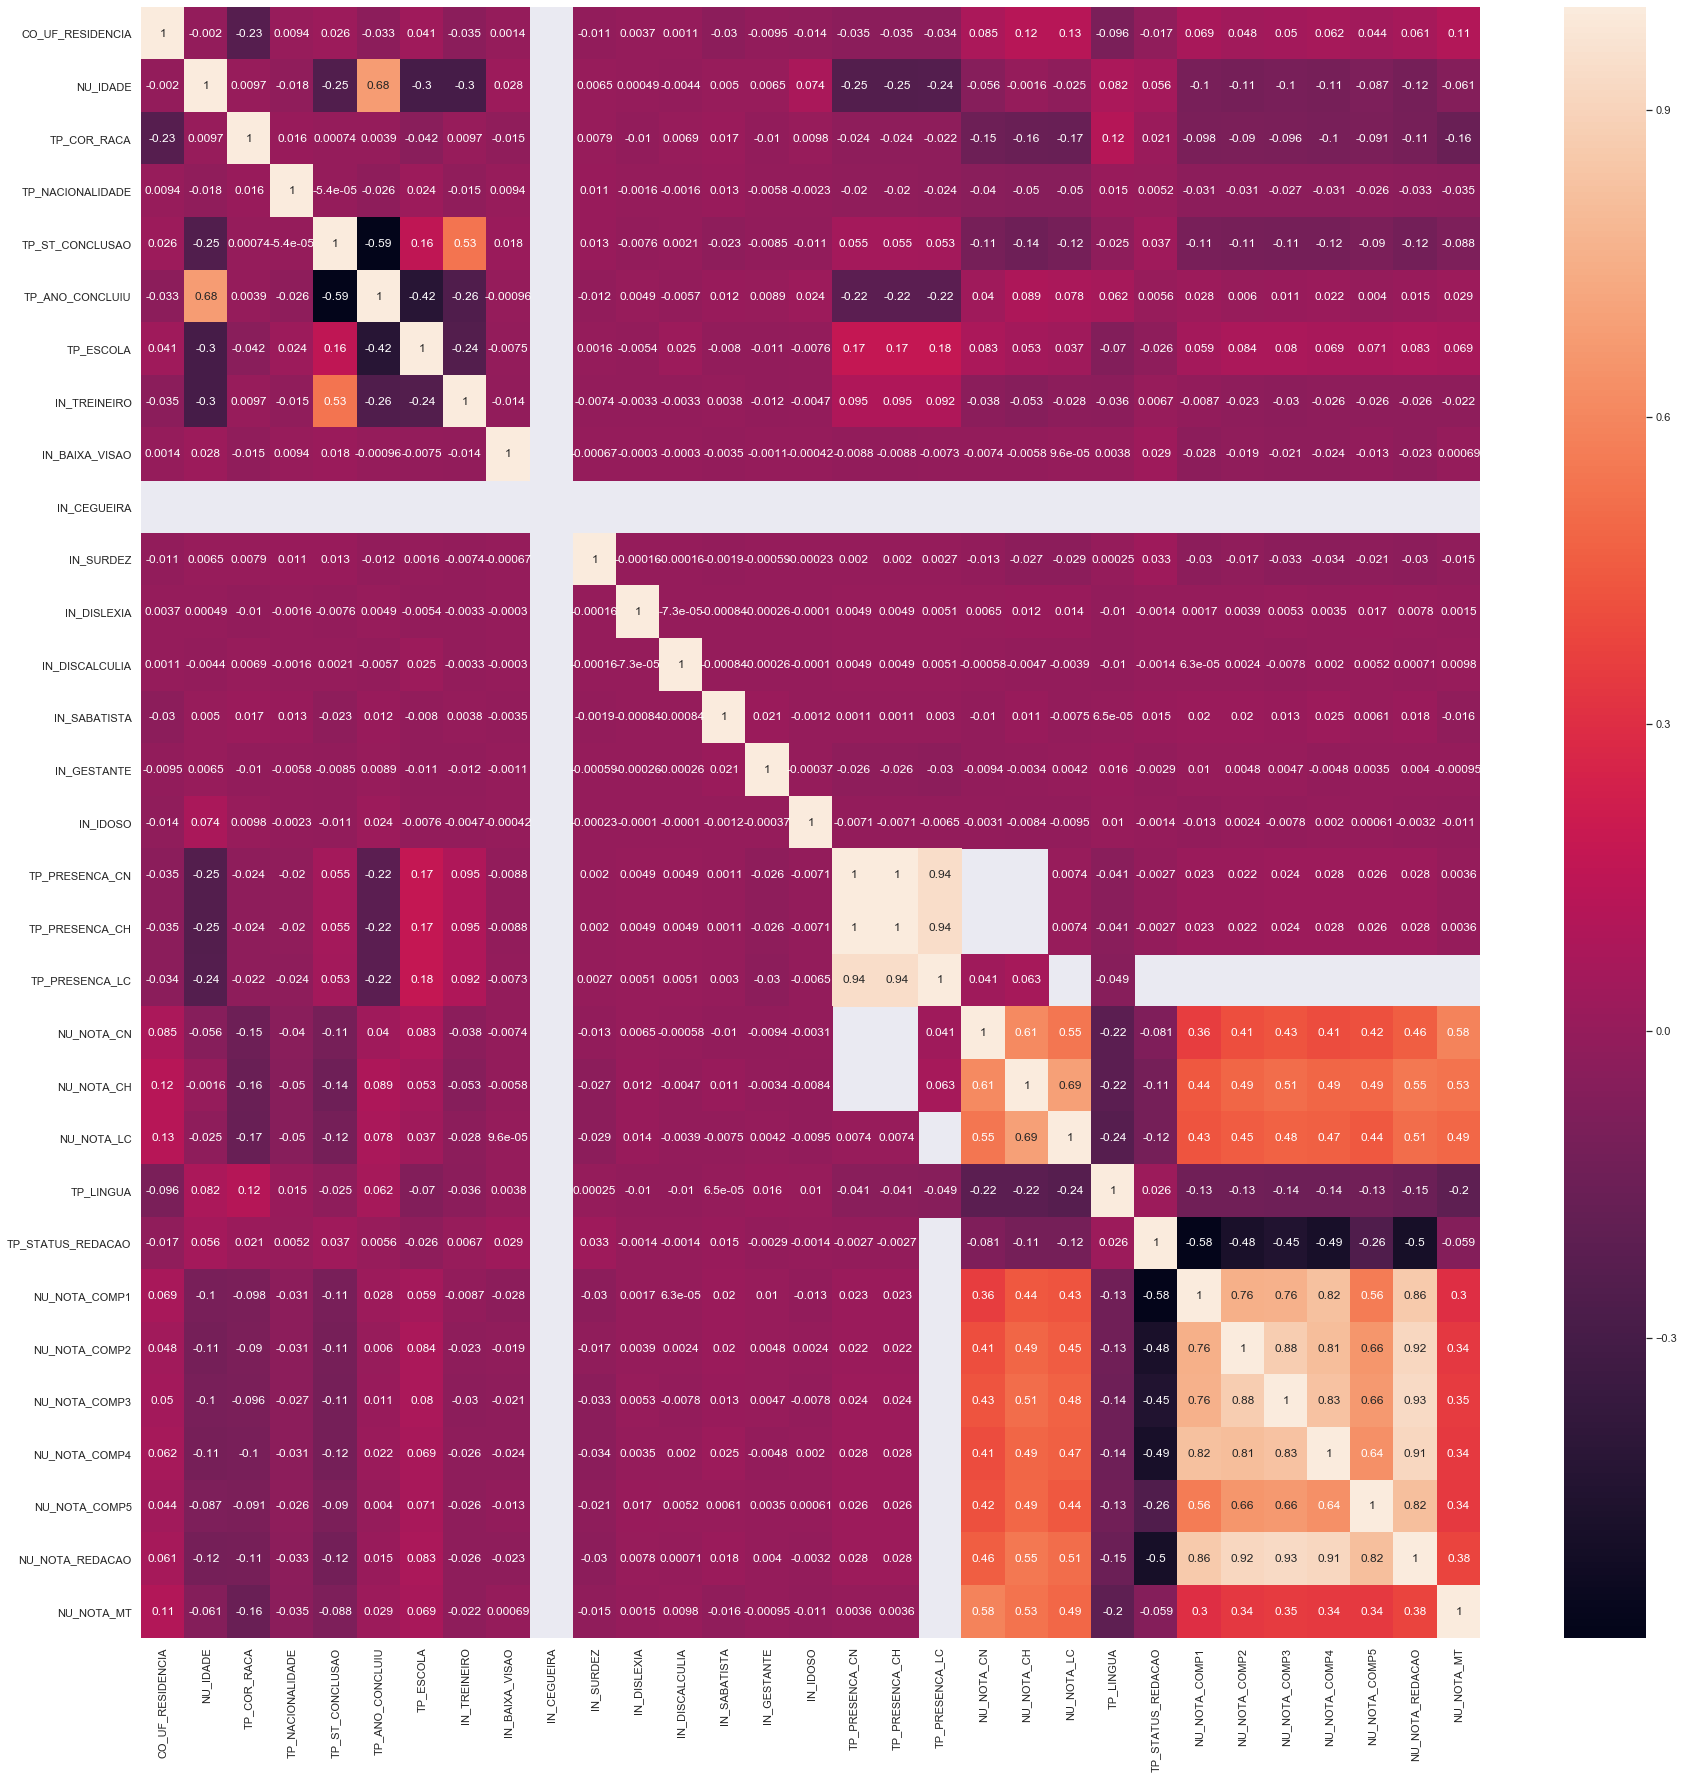

In [361]:
#heatmap das variáveis
sns.heatmap(matriz_corr, annot=True)

In [362]:
#variaveis com maiores correlações
var_corr=['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_MT']

c:\users\t-gamer\anaconda3\envs\codenation\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\t-gamer\anaconda3\envs\codenation\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


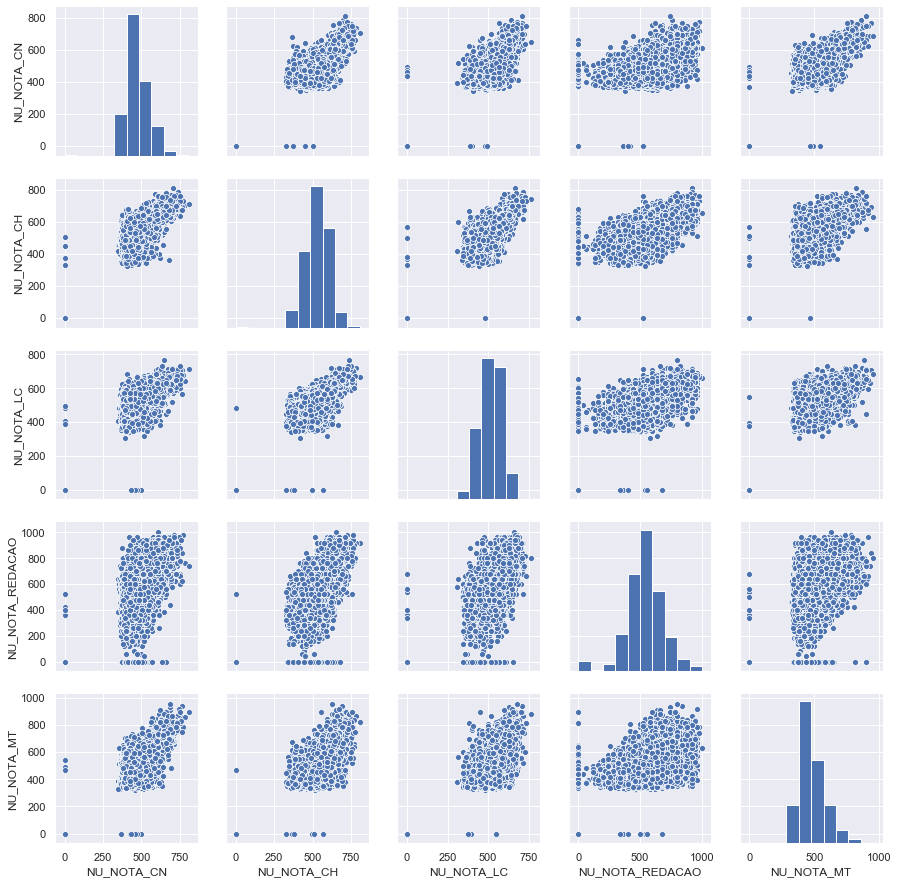

In [363]:
#plotando os dados para visualização das correlações
sns.pairplot(data=df_train, vars=var_corr)

In [364]:
#definindo o X e y
y=df_train['NU_NOTA_MT']
X=df_train[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']]

In [365]:
#verificando se NaN na nota são referentes as faltas e provas anuladas 
df_train[df_train['TP_PRESENCA_LC'] != 1]['NU_NOTA_MT'].isna().sum()

3597

Pelo dataframe criado para analise dos dados, vemos que o numero de missings na coluna NU_NOTA_MT é igual a 3597.
Para confirmar se os missings são referentes a pessoas que faltaram ou foram elimados da prova, filtrei a coluna TP_PRESENCA_LC (a prova de matemática é feita no mesmo dia que a prova de linguagens) e contei o numero de missings da coluna da nota de matetica e temos a confirmação.

In [366]:
#Preenchendo os missings com 0 e separando em treino e teste
y.fillna(0,inplace=True)
X.fillna(0, inplace=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

c:\users\t-gamer\anaconda3\envs\codenation\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [367]:
#Aplicando a regressão linear
linear_regression=LinearRegression()

In [368]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [369]:
#prevendo o y usando o X_test
y_predicted=linear_regression.predict(X_test)

In [370]:
y_predicted

array([372.31945229,  -2.74602006, 532.90552589, ...,  -2.74602006,
       492.83771027, 395.1113745 ])

In [371]:
#como não há nota negativa, substitui os negativos por 0
lista=list(y_predicted)

In [372]:
df_lista=pd.DataFrame(lista,columns=['y_pred'])

In [373]:
df_lista.shape

(2746, 1)

In [374]:
df_lista['y_pred']=df_lista['y_pred'].apply(lambda x: 0 if x<0 else x)
df_lista.head()

,y_pred
0,372.319452
1,0.000000
2,532.905526
3,651.648344
4,0.000000


In [375]:
#r2 no teste
r2_score(y_test, df_lista['y_pred'])

0.9049345367256495

#### Aplicando a regressão na base de teste 

In [376]:
X_teste=df_test[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']]
X_teste.fillna(0,inplace=True)

c:\users\t-gamer\anaconda3\envs\codenation\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [377]:
y_pred_test=linear_regression.predict(X_teste)

In [378]:
len(y_pred_test)

4576

In [379]:
lista_teste=list(y_pred_test)

In [380]:
df_lista_teste=pd.DataFrame(lista_teste,columns=['y_pred'])

In [381]:
df_lista_teste['y_pred']=df_lista_teste['y_pred'].apply(lambda x: 0 if x<0 else x)

In [382]:
df_lista_teste.shape

(4576, 1)

In [383]:
answer=pd.DataFrame()

In [384]:
answer['NU_INSCRICAO']=df_test['NU_INSCRICAO']

In [385]:
answer['NU_NOTA_MT']=df_lista_teste['y_pred']

In [386]:
answer

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,424.811927
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,482.100292
2,b38a03232f43b11c9d0788abaf060f7366053b6d,561.324952
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,549.047685
5,e656d6bad65c93fb2880f1eba5037008c8e75774,475.195683
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,536.643645
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,413.277315
8,043c544a2104aa8a9849f1a703a08d37a2f16839,492.016040
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,462.505845


In [387]:
answer.to_csv("answer.csv",index=False)